# Decision Tree Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

### setting the date column 

In [2]:
data = pd.read_csv('reduced_gujarat.csv')
data['Date'].head()

0    01/01/2011
1    02/01/2011
2    03/01/2011
3    04/01/2011
4    05/01/2011
Name: Date, dtype: object

In [3]:
import datetime as dt
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].head()

0   2011-01-01
1   2011-02-01
2   2011-03-01
3   2011-04-01
4   2011-05-01
Name: Date, dtype: datetime64[ns]

In [4]:
print(data)

       year     district            variety       Date  month  modal_price
0      2011       Amreli              Other 2011-01-01      1         4600
1      2011       Amreli              Other 2011-02-01      1         4600
2      2011       Amreli              Other 2011-03-01      1         4700
3      2011       Amreli              Other 2011-04-01      1         4600
4      2011       Amreli              Other 2011-05-01      1         4600
...     ...          ...                ...        ...    ...          ...
61648  2020  Sabarkantha  Cotton (Unginned) 2020-04-04      4         4500
61649  2020  Sabarkantha  Cotton (Unginned) 2020-05-04      4         4500
61650  2020  Sabarkantha  Cotton (Unginned) 2020-06-04      4         4500
61651  2020  Sabarkantha  Cotton (Unginned) 2020-07-04      4         4500
61652  2020  Sabarkantha  Cotton (Unginned) 2020-08-04      4         4500

[61653 rows x 6 columns]


In [5]:
district = data[['district','modal_price' ,'year']]

In [6]:
type(district)

pandas.core.frame.DataFrame

In [7]:
print(district)

          district  modal_price  year
0           Amreli         4600  2011
1           Amreli         4600  2011
2           Amreli         4700  2011
3           Amreli         4600  2011
4           Amreli         4600  2011
...            ...          ...   ...
61648  Sabarkantha         4500  2020
61649  Sabarkantha         4500  2020
61650  Sabarkantha         4500  2020
61651  Sabarkantha         4500  2020
61652  Sabarkantha         4500  2020

[61653 rows x 3 columns]


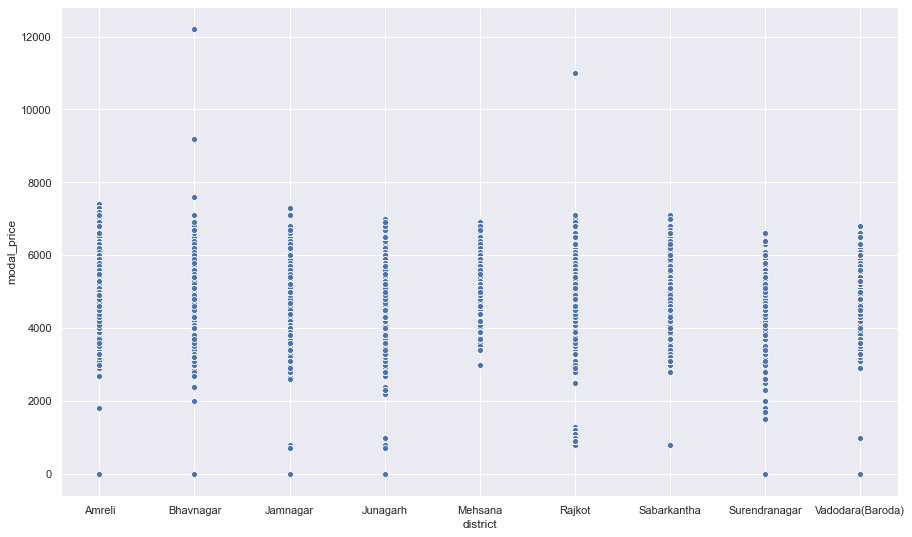

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)})
dis_scats_1 = sns.scatterplot(x= 'district' , y = 'modal_price' , data= district)

In [9]:
# x = district , y = year , hue = modal_price
dist_year = data[['district' , 'year' , 'modal_price']]

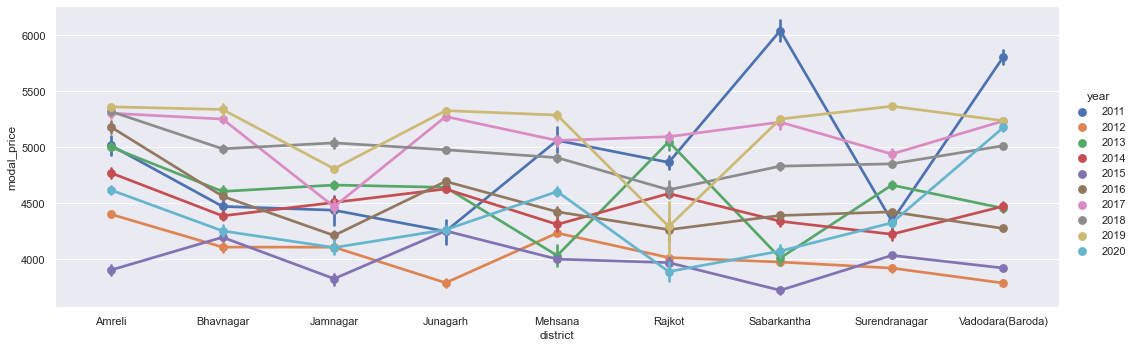

In [10]:
dis_scats_1 = sns.catplot(x= 'district' , y = 'modal_price' , data= district , hue="year", kind="point", height=5, aspect=3)

In [11]:
variety = data[['district' , 'modal_price' , 'variety']]

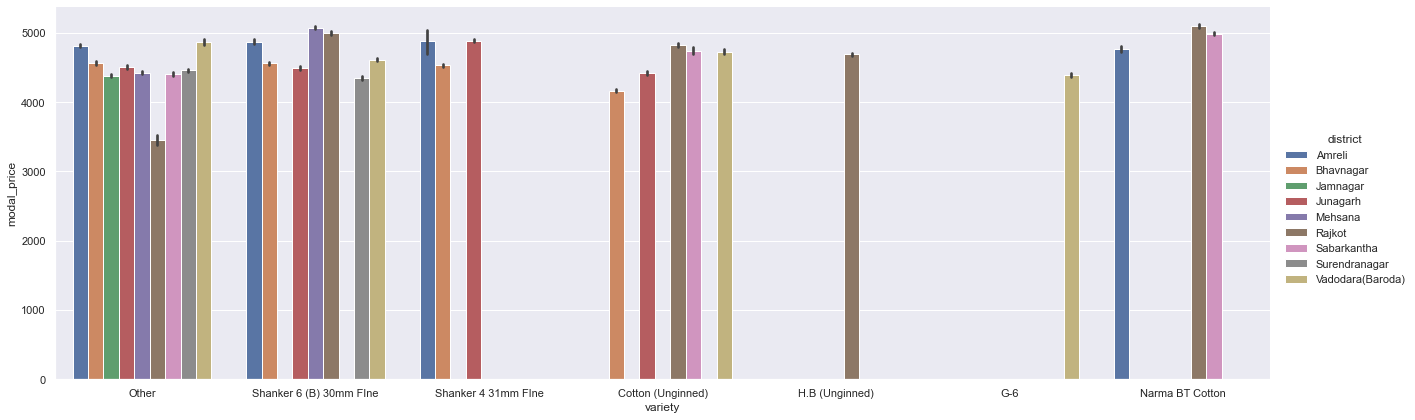

In [12]:
var_scats_1 = sns.catplot(x= 'variety' , y = 'modal_price' , hue = 'district' , data = variety , kind = "bar",height=6, aspect=3)

### getting the empty value 

In [13]:
data[data == np.inf] = np.nan
data.fillna(data.mean() , inplace = True)

In [14]:
X = data.iloc[: , [0,1,2,4]].values
X

array([[2011, 'Amreli', 'Other', 1],
       [2011, 'Amreli', 'Other', 1],
       [2011, 'Amreli', 'Other', 1],
       ...,
       [2020, 'Sabarkantha', 'Cotton (Unginned)', 4],
       [2020, 'Sabarkantha', 'Cotton (Unginned)', 4],
       [2020, 'Sabarkantha', 'Cotton (Unginned)', 4]], dtype=object)

In [15]:
print(X[:,1])

['Amreli' 'Amreli' 'Amreli' ... 'Sabarkantha' 'Sabarkantha' 'Sabarkantha']


In [16]:
from sklearn.preprocessing import LabelEncoder
le_1 = LabelEncoder()
le_2 = LabelEncoder()
X[:,1] = le_1.fit_transform(X[:,1])
X[:,2] = le_2.fit_transform(X[:,2])
pd.DataFrame(X).to_csv('LabelEncoded_gujarat_final.csv')
X

array([[2011, 0, 4, 1],
       [2011, 0, 4, 1],
       [2011, 0, 4, 1],
       ...,
       [2020, 6, 0, 4],
       [2020, 6, 0, 4],
       [2020, 6, 0, 4]], dtype=object)

In [17]:
y = data.iloc[:,5].values
y

array([4600, 4600, 4700, ..., 4500, 4500, 4500], dtype=int64)

### train test split 

In [18]:
from sklearn.model_selection import train_test_split as tts
X_train ,X_test, y_train, y_test = tts(X,y,test_size = 0.2,random_state = 0)
y_train

array([5800, 1100, 3800, ..., 4900, 5200, 4400], dtype=int64)

In [19]:
X_train

array([[2017, 0, 6, 3],
       [2017, 5, 4, 6],
       [2015, 3, 6, 1],
       ...,
       [2017, 4, 4, 3],
       [2017, 5, 4, 3],
       [2011, 4, 4, 11]], dtype=object)

## Training the Decision Tree Regression model on the Training set

In [20]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [21]:
print(X_test)

[[2013 1 6 1]
 [2020 0 6 4]
 [2015 7 6 9]
 ...
 [2015 3 0 5]
 [2016 1 4 10]
 [2013 8 1 5]]


In [22]:
y_pred_dtr = dtr.predict(X_test)
print(np.concatenate((y_pred_dtr.reshape(len(y_pred_dtr),1), y_test.reshape(len(y_test),1)),1))

[[4128.57142857 4200.        ]
 [5300.         5300.        ]
 [3700.         3700.        ]
 ...
 [4487.5        4600.        ]
 [4731.81818182 5000.        ]
 [4504.34782609 4400.        ]]


In [23]:
import joblib as jb
jb.dump(dtr,'decision_tree_gujarat.ml')
jb.dump(dtr,'decision_tree_gujarat.pkl')

['decision_tree_gujarat.pkl']

In [ ]:
jb.dump(le_1,'le_1.pkl')
jb.dump(le_2,'le_2.pkl')

## Evaluating the Model Performance

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_dtr)

0.8993017899971345

In [25]:
le_1.transform(['Amreli'])

array([0], dtype=int64)

In [27]:
y_pred = dtr.predict([[2021,le_1.transform(['Amreli']),le_2.transform(['Shanker 6 (B) 30mm FIne']),1]])

In [28]:
print(y_pred)

[5175.]


### Random forest Regression 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

In [ ]:
y_pred_rfr = rfr.predict(X_test)
print(np.concatenate((y_pred_rfr.reshape(len(y_pred_rfr),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rfr)

In [ ]:
import joblib as jb
jb.dump(rfr,'random_forest_gujarat.ml')
jb.dump(rfr,'random_forest_gujarat.pkl')